Hello friends. This is an example of a simple project to review and analyze the shares of PepsiCo company. At first, I came with simple indicators from the technical side. I made a strong model with high accuracy for learning machine.

سلام دوستان .این نمونه پروژه ی ساده برای بررسی و تحلیل سهام شرکت پپسیکو است که در ابتدا با اندیکاتور های ساده از جنبه تکنیکالی اومدم بررسی کردم که دیدم استراتژی مووینگ و شاخص قدرت نسبی در بلند مدت روی این سهام سوداور است بعد اومدم با استفاده از ماشین لرننیگ یک مدل قوی با دقت بالا ساختم .

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import*
from sklearn.model_selection import cross_val_score

In [2]:
data = pd.read_csv("PEP.csv")
data.head(5)

,Date,Open,High,Low,Close,Volume
0,1972-06-01,0.000000,0.399388,0.394770,0.399388,318600
1,1972-06-02,0.399388,0.403428,0.398233,0.398233,140400
2,1972-06-05,0.399391,0.399970,0.386078,0.393603,469800
3,1972-06-06,0.390130,0.390130,0.388973,0.390130,140400
4,1972-06-07,0.390130,0.390709,0.386657,0.387815,178200


In [3]:
data.shape

(13167, 6)

In [4]:
data.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [5]:
data.dtypes

Date       object
Open      float64
High      float64
Low       float64
Close     float64
Volume      int64
dtype: object

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13167 entries, 0 to 13166
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    13167 non-null  object 
 1   Open    13167 non-null  float64
 2   High    13167 non-null  float64
 3   Low     13167 non-null  float64
 4   Close   13167 non-null  float64
 5   Volume  13167 non-null  int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 617.3+ KB


In [7]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [8]:
data.describe()

,Open,High,Low,Close,Volume
count,13167.000000,13167.000000,13167.000000,13167.000000,1.316700e+04
mean,35.700170,35.979474,35.422165,35.712414,4.161206e+06
std,45.741579,46.052211,45.399711,45.737306,2.794869e+06
min,0.000000,0.146866,0.141449,0.141449,0.000000e+00
25%,1.247521,1.254301,1.239385,1.246165,2.472800e+06
50%,18.823605,19.099758,18.564689,18.836313,3.747000e+06
75%,45.157750,45.472708,44.838472,45.197689,5.259800e+06
max,189.425174,189.723904,187.864060,188.991531,4.616280e+07


Text(0.5, 1.0, 'simple plot')

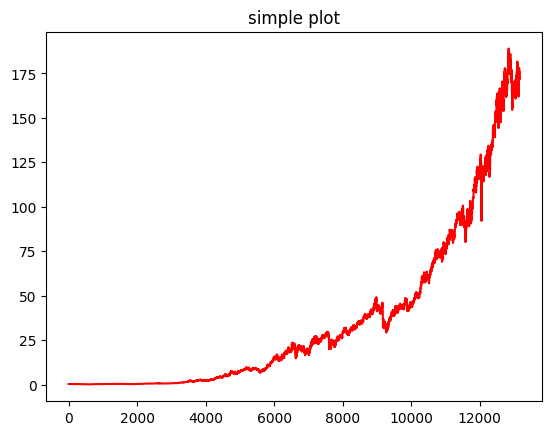

In [9]:
data['Close'].plot(color='red' , label='simple plot')
plt.title('simple plot')


Text(0.5, 1.0, 'logaritm plot')

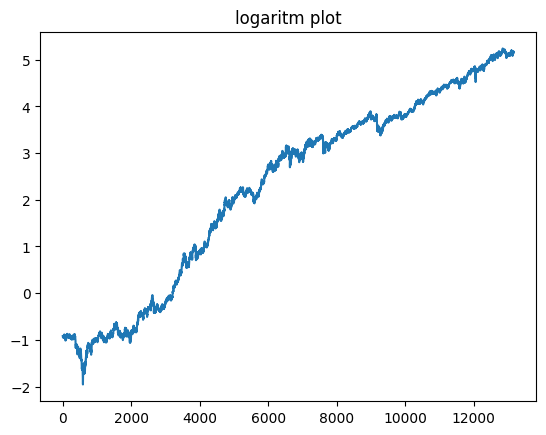

In [11]:
df_close  =np.log(data['Close'])
df_close.plot()
plt.title('logaritm plot')

In [12]:
data['MA200'] = data['Close'].rolling(window=200).mean()

In [13]:
data

,Date,Open,High,Low,Close,Volume,MA200
0,1972-06-01,0.000000,0.399388,0.394770,0.399388,318600,NaN
1,1972-06-02,0.399388,0.403428,0.398233,0.398233,140400,NaN
2,1972-06-05,0.399391,0.399970,0.386078,0.393603,469800,NaN
3,1972-06-06,0.390130,0.390130,0.388973,0.390130,140400,NaN
4,1972-06-07,0.390130,0.390709,0.386657,0.387815,178200,NaN
...,...,...,...,...,...,...,...
13162,2024-08-14,172.229996,174.339996,171.929993,173.710007,3555800,167.890589
13163,2024-08-15,173.710007,174.300003,171.830002,172.520004,4472100,167.973277
13164,2024-08-16,172.520004,172.779999,171.110001,172.619995,4614600,168.043468
13165,2024-08-19,172.660004,173.979996,172.440002,173.820007,3521700,168.114773


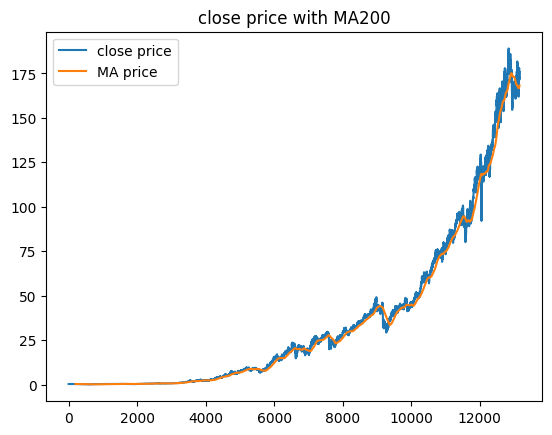

In [14]:
plt.plot(data['Close'] , label = 'close price')
plt.plot(data['MA200'] , label = 'MA price')
plt.title('close price with MA200')
plt.legend()

In [16]:
def calculate_rsi(data, window=14):
    delta = data['Close'].diff()  
    gain = delta.where(delta > 0, 0)  
    loss = -delta.where(delta < 0, 0)

    avg_gain = gain.rolling(window=window, min_periods=1).mean()
    avg_loss = loss.rolling(window=window, min_periods=1).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))

    return rsi
data['RSI'] = calculate_rsi(data, window=14)

In [17]:
data

,Date,Open,High,Low,Close,Volume,MA200,RSI
0,1972-06-01,0.000000,0.399388,0.394770,0.399388,318600,NaN,NaN
1,1972-06-02,0.399388,0.403428,0.398233,0.398233,140400,NaN,0.000000
2,1972-06-05,0.399391,0.399970,0.386078,0.393603,469800,NaN,0.000000
3,1972-06-06,0.390130,0.390130,0.388973,0.390130,140400,NaN,0.000000
4,1972-06-07,0.390130,0.390709,0.386657,0.387815,178200,NaN,0.000000
...,...,...,...,...,...,...,...,...
13162,2024-08-14,172.229996,174.339996,171.929993,173.710007,3555800,167.890589,57.386049
13163,2024-08-15,173.710007,174.300003,171.830002,172.520004,4472100,167.973277,49.349193
13164,2024-08-16,172.520004,172.779999,171.110001,172.619995,4614600,168.043468,48.295751
13165,2024-08-19,172.660004,173.979996,172.440002,173.820007,3521700,168.114773,51.731640


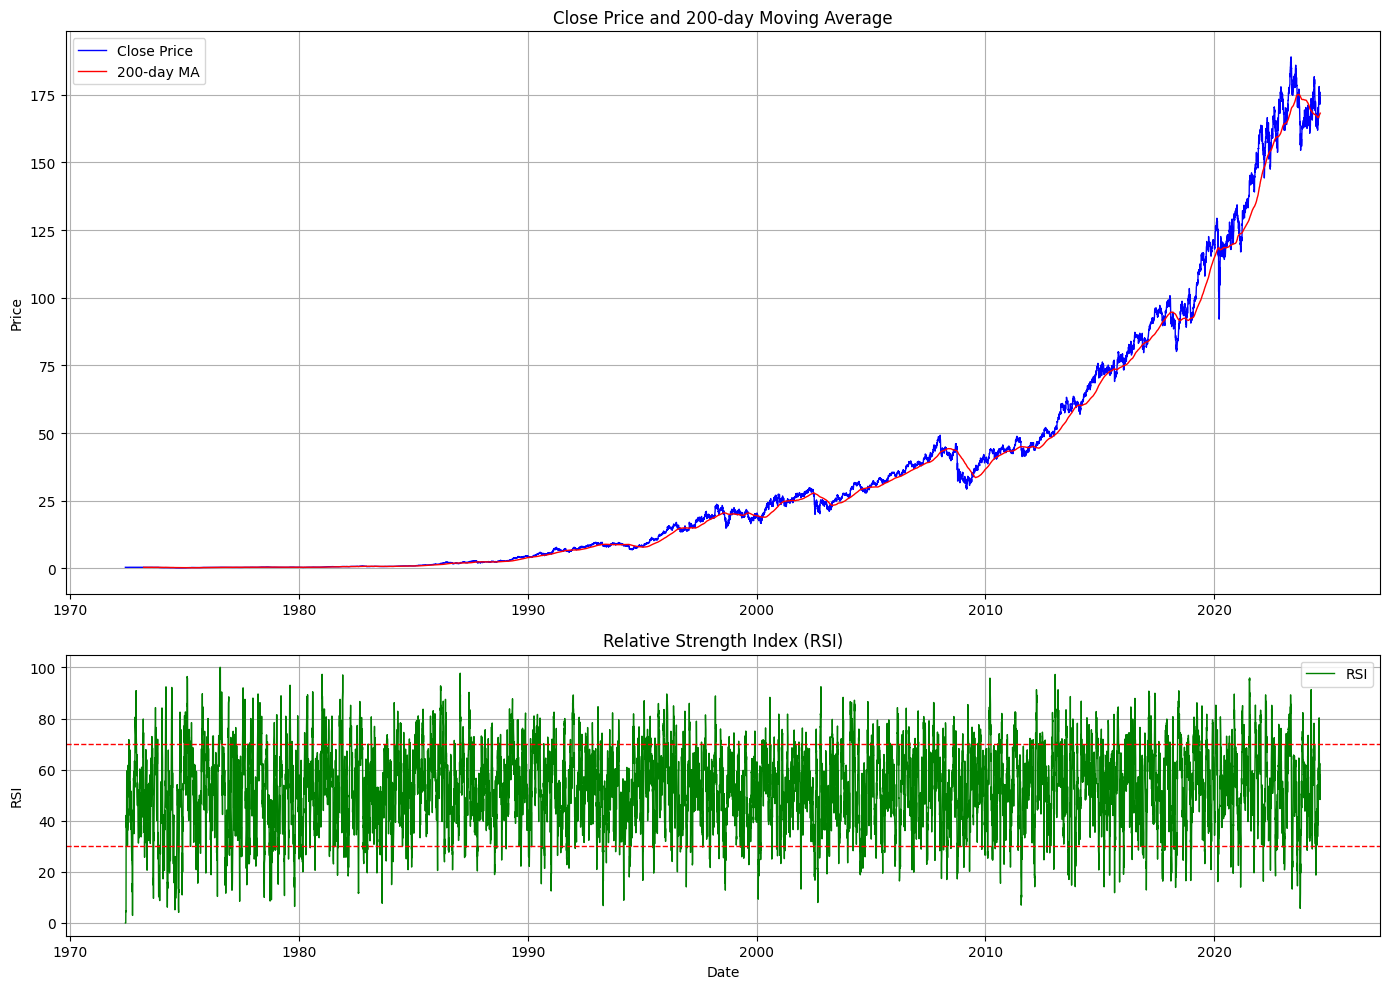

In [18]:
data['Date'] = pd.to_datetime(data['Date'])
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10), gridspec_kw={'height_ratios': [2, 1]})


ax1.plot(data['Date'], data['Close'], label='Close Price', color='blue', lw=1)
ax1.plot(data['Date'], data['MA200'], label='200-day MA', color='red', lw=1)
ax1.set_title('Close Price and 200-day Moving Average')
ax1.set_ylabel('Price')
ax1.legend()
ax1.grid(True)


ax2.plot(data['Date'], data['RSI'], label='RSI', color='green', lw=1)
ax2.axhline(70, color='red', linestyle='--', lw=1)  
ax2.axhline(30, color='red', linestyle='--', lw=1)  
ax2.set_title('Relative Strength Index (RSI)')
ax2.set_ylabel('RSI')
ax2.set_xlabel('Date')
ax2.legend()
ax2.grid(True)


plt.tight_layout()
plt.show()

In [19]:

data['position'] = 'no position'

for i in range(1, len(data)):
    if (data['Close'].iloc[i] > data['Close'].iloc[i-1]) & (data['RSI'].iloc[i] > 50) & (data['Close'].iloc[i]>data['MA200'].iloc[i]):
        data.loc[i, 'position'] = 'buy'  
    elif (data['Close'].iloc[i] < data['Close'].iloc[i-1]) & (data['RSI'].iloc[i] < 50) & (data['Close'].iloc[i]<data['MA200'].iloc[i]):
        data.loc[i, 'position'] = 'sell'  
    else:
        data.loc[i, 'position'] = 'no position'  
       




position_counts = data['position'].value_counts()
print("تعداد بای:", position_counts.get('buy', 0))
print("تعداد سل:", position_counts.get('sell', 0))    


تعداد بای: 3386
تعداد سل: 1166


In [20]:

data['result'] = 'no_result'

tp_sl_value = data['Close'].iloc[i] * 0.01  # 1% of the close price



def check_tp_sl(index, position, entry_price, tp_sl_value):
    for i in range(index + 1, len(data)):
        current_price = data['Close'].iloc[i]
        if position == 'buy':
            if current_price >= entry_price + tp_sl_value:
                return 'tp'  
            elif current_price <= entry_price - tp_sl_value:
                return 'sl' 
        elif position == 'sell':
            if current_price <= entry_price - tp_sl_value:
                return 'tp'  
            elif current_price >= entry_price + tp_sl_value:
                return 'sl'  
    return 'no_result'  


for i in range(len(data)):
    if data.loc[i, 'position'] == 'buy':
        data.loc[i, 'result'] = check_tp_sl(i, 'buy', data.loc[i, 'Close'], tp_sl_value)
    elif data.loc[i, 'position'] == 'sell':
        data.loc[i, 'result'] = check_tp_sl(i, 'sell', data.loc[i, 'Close'], tp_sl_value)


result_counts = data['result'].value_counts()
print("تعداد تیپی (tp):", result_counts.get('tp', 0))
print("تعداد استاپ (sl):", result_counts.get('sl', 0))



تعداد تیپی (tp): 2671
تعداد استاپ (sl): 1880


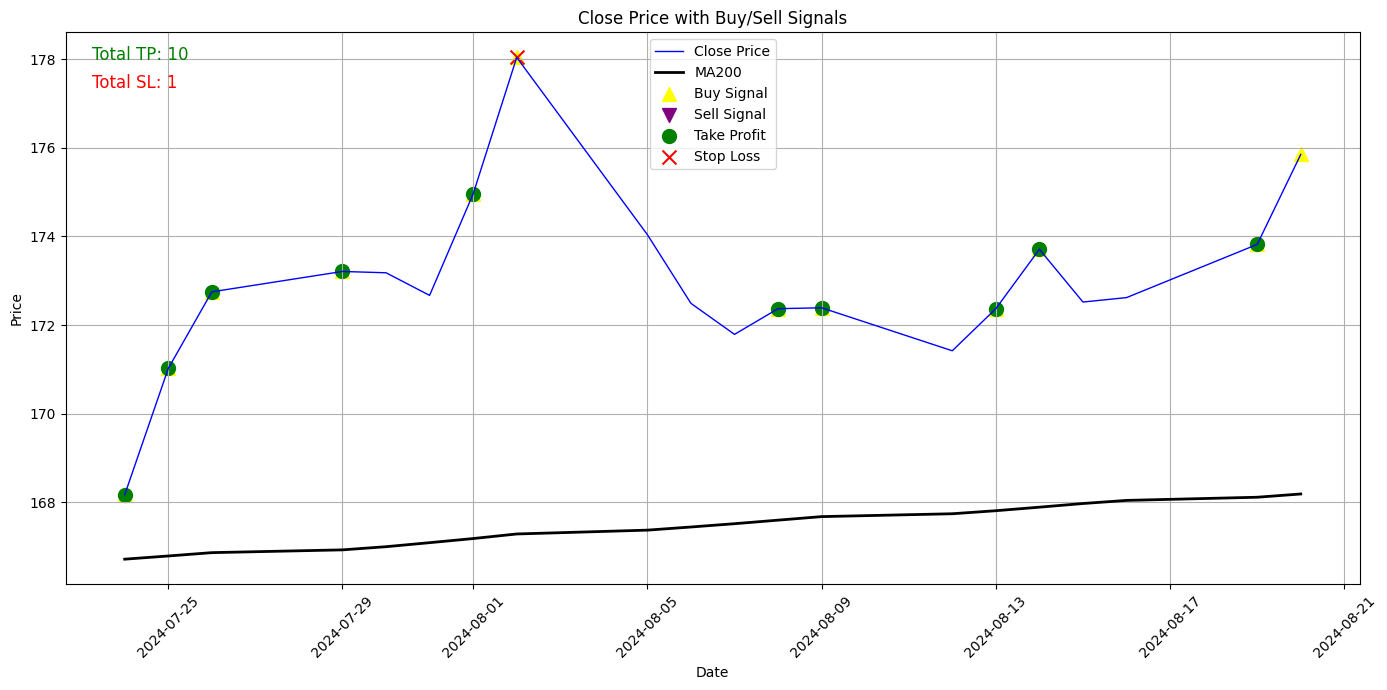

In [21]:


num_candles = 20

data_subset = data.tail(num_candles)

plt.figure(figsize=(14, 7))
plt.plot(data_subset['Date'], data_subset['Close'], label='Close Price', color='blue', lw=1)
plt.plot(data_subset['Date'], data_subset['MA200'], label='MA200', color='black', lw=2)

buy_signals = data_subset[data_subset['position'] == 'buy']
sell_signals = data_subset[data_subset['position'] == 'sell']
tp_signals = data_subset[data_subset['result'] == 'tp']
sl_signals = data_subset[data_subset['result'] == 'sl']

plt.scatter(buy_signals['Date'], buy_signals['Close'], marker='^', color='yellow', label='Buy Signal', s=100)
plt.scatter(sell_signals['Date'], sell_signals['Close'], marker='v', color='purple', label='Sell Signal', s=100)
plt.scatter(tp_signals['Date'], tp_signals['Close'], marker='o', color='green', label='Take Profit', s=100)
plt.scatter(sl_signals['Date'], sl_signals['Close'], marker='x', color='red', label='Stop Loss', s=100)


num_tp = len(tp_signals)
num_sl = len(sl_signals)
plt.text(0.02, 0.95, f'Total TP: {num_tp}', transform=plt.gca().transAxes, color='green', fontsize=12)
plt.text(0.02, 0.90, f'Total SL: {num_sl}', transform=plt.gca().transAxes, color='red', fontsize=12)


plt.title('Close Price with Buy/Sell Signals')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [22]:
data

,Date,Open,High,Low,Close,Volume,MA200,RSI,position,result
0,1972-06-01,0.000000,0.399388,0.394770,0.399388,318600,NaN,NaN,no position,no_result
1,1972-06-02,0.399388,0.403428,0.398233,0.398233,140400,NaN,0.000000,no position,no_result
2,1972-06-05,0.399391,0.399970,0.386078,0.393603,469800,NaN,0.000000,no position,no_result
3,1972-06-06,0.390130,0.390130,0.388973,0.390130,140400,NaN,0.000000,no position,no_result
4,1972-06-07,0.390130,0.390709,0.386657,0.387815,178200,NaN,0.000000,no position,no_result
...,...,...,...,...,...,...,...,...,...,...
13162,2024-08-14,172.229996,174.339996,171.929993,173.710007,3555800,167.890589,57.386049,buy,tp
13163,2024-08-15,173.710007,174.300003,171.830002,172.520004,4472100,167.973277,49.349193,no position,no_result
13164,2024-08-16,172.520004,172.779999,171.110001,172.619995,4614600,168.043468,48.295751,no position,no_result
13165,2024-08-19,172.660004,173.979996,172.440002,173.820007,3521700,168.114773,51.731640,buy,tp


In [23]:
X = data[['Open' , 'High' , 'Low' , 'Volume' , 'RSI' , 'MA200']]
Y = data[['Close']]


In [29]:
x_train , x_test , y_train , y_test = train_test_split(X , Y , test_size=0.4 , random_state=42)

In [30]:
xg_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42 ,reg_alpha=0.1, reg_lambda=0.1)

xg_model.fit(x_train , y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [31]:
y_pred = xg_model.predict(x_test)

In [32]:
MAE = mean_absolute_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_test, y_pred)

print("MAE:", MAE)
print("MSE:", MSE)
print("RMSE:", RMSE)
print("R2:", R2)

MAE: 0.2221498033970747
MSE: 0.2299046559094568
RMSE: 0.4794837389416421
R2: 0.9998881816864014


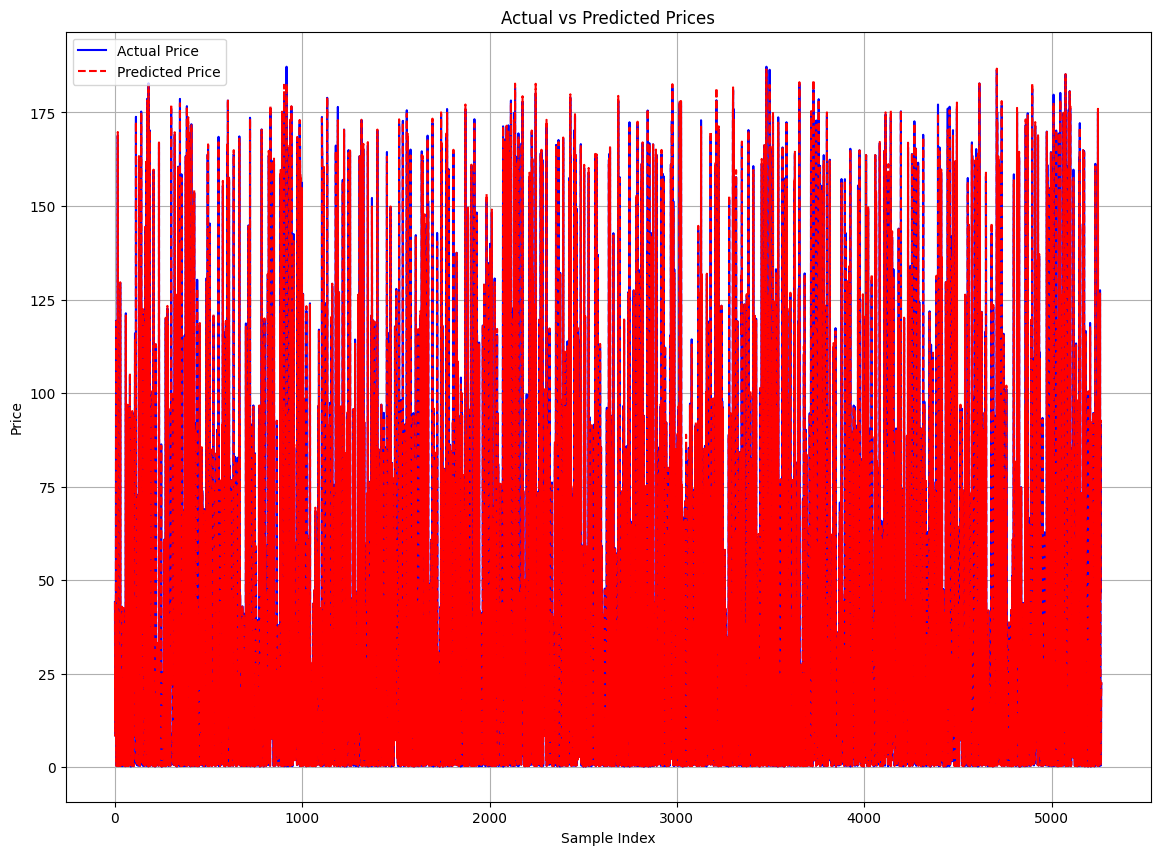

In [33]:


plt.figure(figsize=(14, 10))
plt.plot(y_test.values, label='Actual Price', color='blue')


plt.plot(y_pred, label='Predicted Price', color='red', linestyle='--')
plt.title('Actual vs Predicted Prices')
plt.xlabel('Sample Index')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


پیشنهادات : به عنوان یک برنامه نویس و کسی که ۶ سال توی بازاری مثل فارکس کار کردم این مثال واقعا از چندین جهت حائز اهمیته:اول اینکه باید قبل از معامله از درست بودن استراتژی اطمینان حاصل کنیم یعنی اصلا ببینیم استراتژی سودآور هست یا نه.
دوم اینکه آیا بانک های بزرگ و موسسات با پیشرفت چشمگیر علم هنوز دستی معامله میکنند!!!
کمی تفکر....................

Suggestions: As a programmer and someone who worked in a market like forex for 6 years, this example is really important in several ways: First, before trading, we must make sure that the strategy is correct, that is, to see if the strategy is profitable or not.
Second, do big banks and institutions still trade manually with the significant progress of science!!!
A little thought